# Delivery_time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
dt = pd.read_csv('delivery_time.csv')

In [4]:
dt

Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5

In [5]:
dt.shape

(21, 2)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dt.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

In [8]:
dt.corr()

Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000

In [9]:
# Renaming the columns
dt=dt.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'})

In [ ]:
dt.head()

Delivery_Time  Sorting_Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

<Axes: >

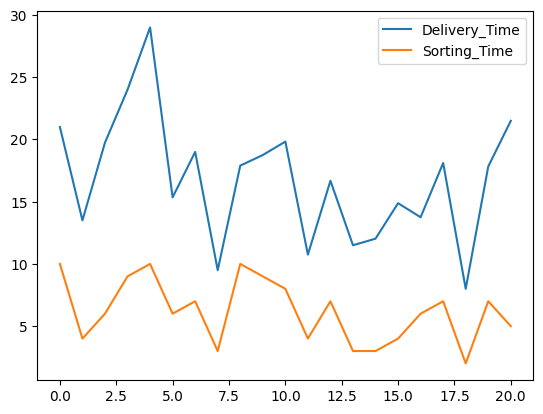

In [10]:
# Visualization
dt.plot()

<ipython-input-12-c56985e03300>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Delivery_Time'])


<Axes: xlabel='Delivery_Time', ylabel='Density'>

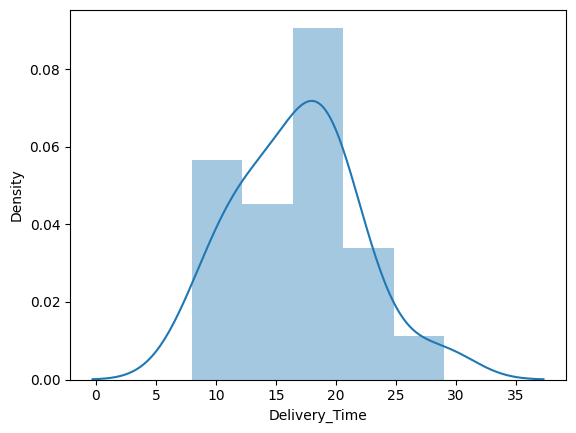

In [12]:
sns.distplot(dt['Delivery_Time'])

<ipython-input-15-83331e8ed20a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Sorting_Time'])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

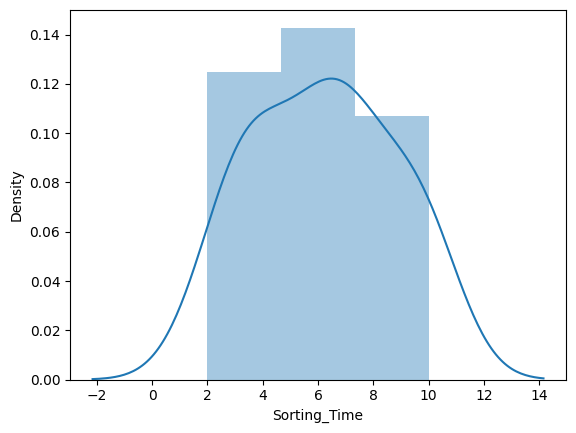

In [15]:
sns.distplot(dt['Sorting_Time'])

<ipython-input-16-b6061d4215fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt)


<Axes: ylabel='Density'>

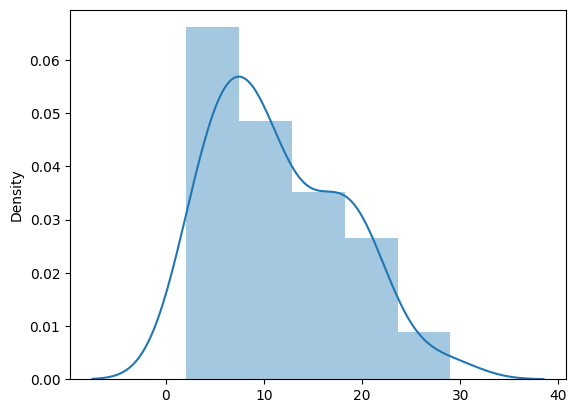

In [16]:
sns.distplot(dt)

<Axes: >

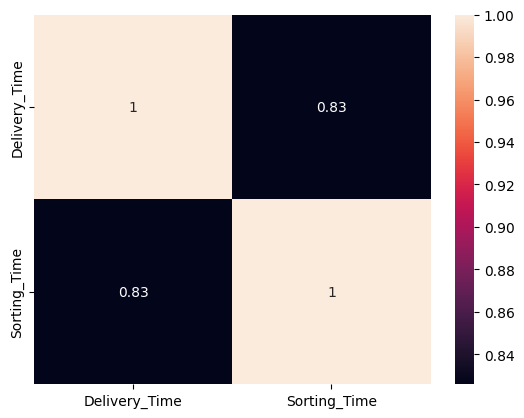

In [14]:
sns.heatmap(dt.corr(),annot=True)

<Axes: >

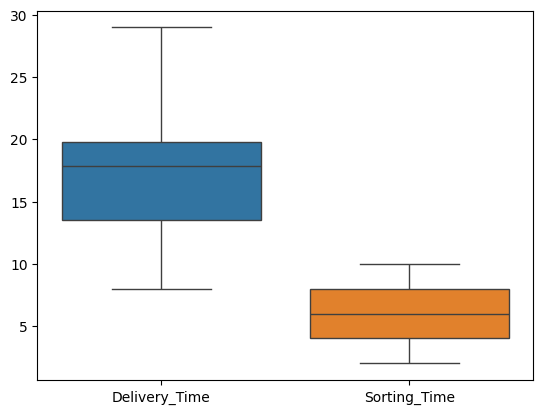

In [17]:
sns.boxplot(data = dt)

<Axes: xlabel='Sorting_Time'>

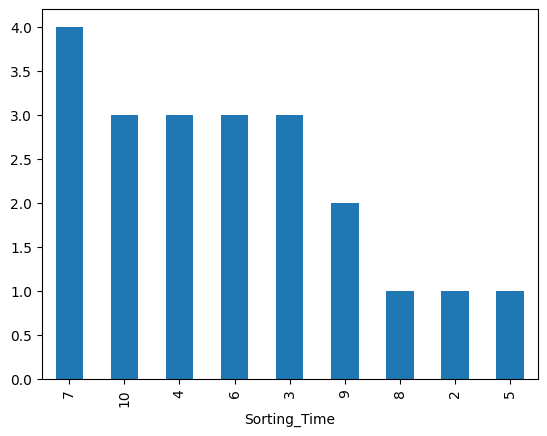

In [19]:
dt['Sorting_Time'].value_counts().plot.bar()

In [21]:
# Fitting a linear regression model using statsmodel library
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data=dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           3.98e-06
Time:                        05:50:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

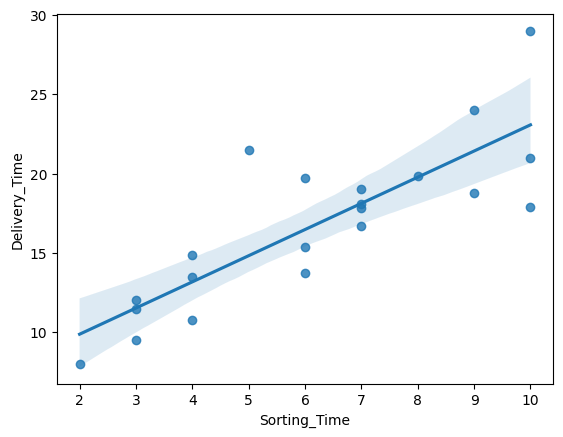

In [22]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data = dt)

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [25]:
dt['Sorting_Time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5])

In [26]:
# Predict delivery time for sorting time 1
1.649020*1+6.582734

8.231754

In [27]:
# Predict delivery time for sorting time 11 and 12
newdt = pd.Series([11,12])
newdt

0    11
1    12
dtype: int64

In [28]:
data_pred = pd.DataFrame(newdt,columns=['Sorting_Time'])
data_pred

Sorting_Time
0            11
1            12

In [29]:
model.predict(data_pred)

0    24.721953
1    26.370973
dtype: float64

In [34]:
# Building original model (using sklearn) and transformational models like log, square, sqrt and calculating those rmse values.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = dt[['Sorting_Time']]
y = dt[['Delivery_Time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [38]:
# Original model (no transformation)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_original = calculate_rmse(y_test, y_pred)
rmse_original

3.7478979383962754

In [39]:
# Log Transformation
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)
y_pred_log = model_log.predict(X_test_log)
rmse_log = calculate_rmse(y_test, y_pred_log)
rmse_log

2.5276247210276237

In [40]:
# Square Transformation
X_train_square = np.square(X_train)
X_test_square = np.square(X_test)
model_square = LinearRegression()
model_square.fit(X_train_square, y_train)
y_pred_square = model_square.predict(X_test_square)
rmse_square = calculate_rmse(y_test, y_pred_square)
rmse_square

4.776557534805919

In [41]:
# Square Root Transformation
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)
model_sqrt = LinearRegression()
model_sqrt.fit(X_train_sqrt, y_train)
y_pred_sqrt = model_sqrt.predict(X_test_sqrt)
rmse_sqrt = calculate_rmse(y_test, y_pred_sqrt)
rmse_sqrt

3.140339761719287

In [42]:
# Print RMSE values
print(f"RMSE (Original): {rmse_original:.4f}")
print(f"RMSE (Log Transformation): {rmse_log:.4f}")
print(f"RMSE (Square Transformation): {rmse_square:.4f}")
print(f"RMSE (Sqrt Transformation): {rmse_sqrt:.4f}")

RMSE (Original): 3.7479
RMSE (Log Transformation): 2.5276
RMSE (Square Transformation): 4.7766
RMSE (Sqrt Transformation): 3.1403


# Salary Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [44]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [45]:
sd = pd.read_csv('Salary_Data.csv')

In [46]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [47]:
sd.shape

(30, 2)

In [48]:
sd.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [49]:
sd.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [50]:
sd.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

<Axes: >

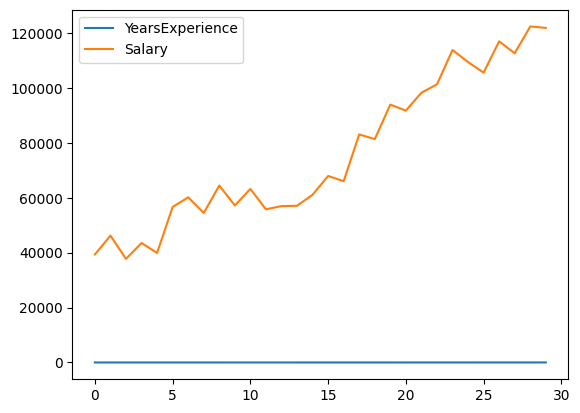

In [58]:
# Visualization
sd.plot()

<ipython-input-59-6807d4f5226a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

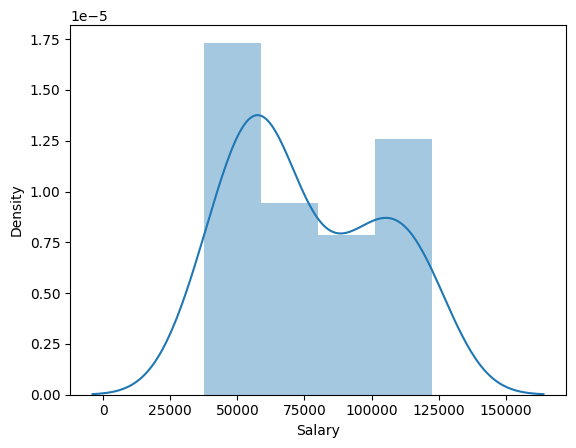

In [59]:
sns.distplot(sd['Salary'])

<ipython-input-60-940aeae6ea01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

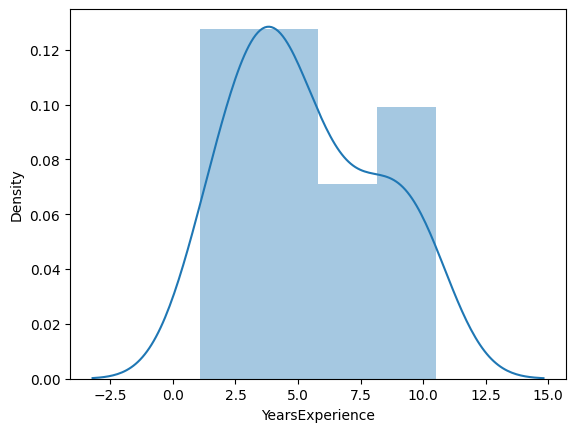

In [60]:
sns.distplot(sd['YearsExperience'])

<ipython-input-61-2132eb8d0539>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd)


<Axes: ylabel='Density'>

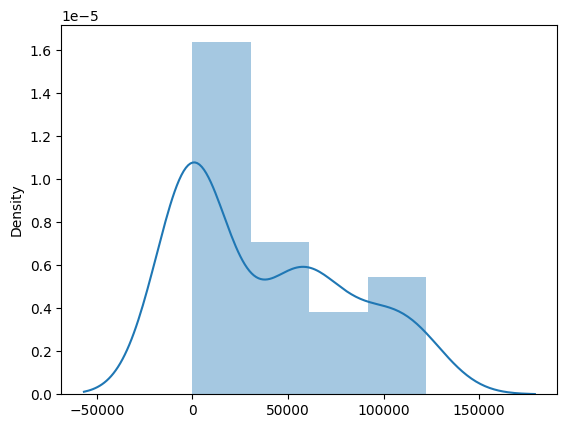

In [61]:
sns.distplot(sd)

<Axes: >

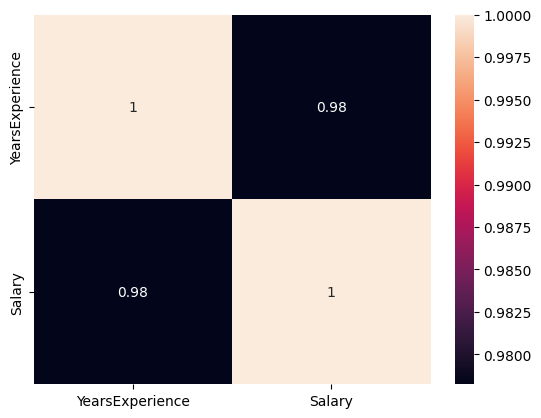

In [62]:
sns.heatmap(sd.corr(),annot=True)

<Axes: >

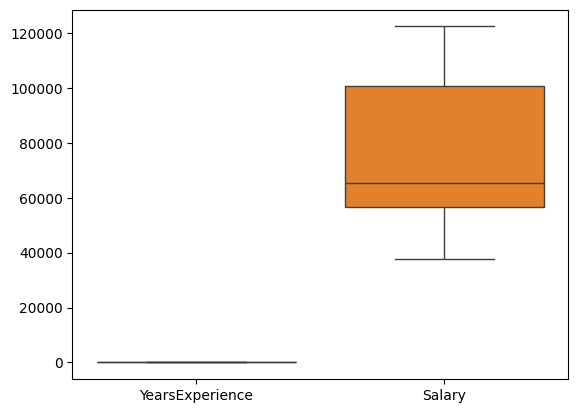

In [63]:
sns.boxplot(data = sd)

<Axes: ylabel='YearsExperience'>

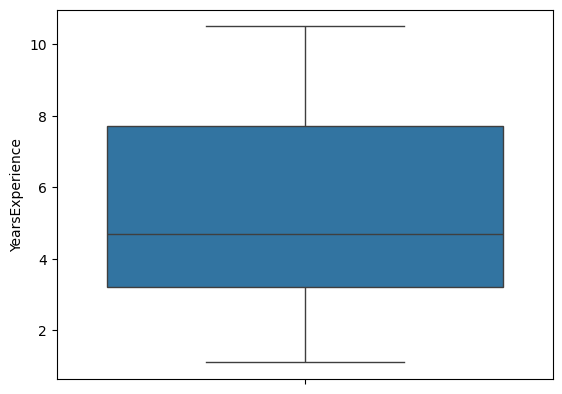

In [66]:
sns.boxplot(data = sd['YearsExperience'])

<Axes: xlabel='YearsExperience'>

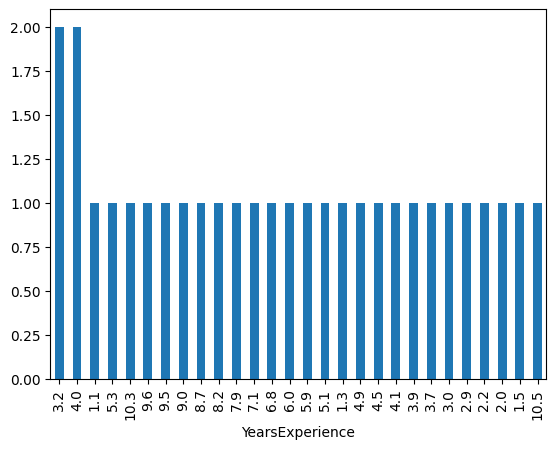

In [67]:
sd['YearsExperience'].value_counts().plot.bar()

In [57]:
# Fitting linear regression using statsmodel library
model = smf.ols("Salary~YearsExperience",data=sd).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

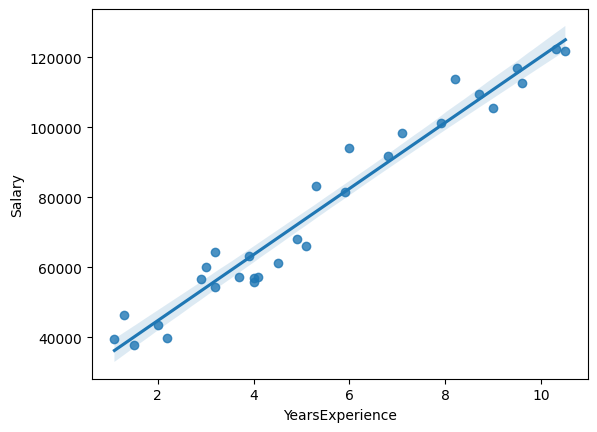

In [52]:
sns.regplot(x="YearsExperience", y="Salary", data = sd)

In [53]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [54]:
sd['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [55]:
# Predict salary for 5 years experiance
9449.962321*5+25792.200199

73042.01180400001

In [56]:
# Predict model for new data points 2.5, 6.5
newsd = pd.Series([2.5,6.5])
data_pred = pd.DataFrame(newsd,columns=['YearsExperience'])
data_pred
model.predict(data_pred)

0    49417.106002
1    87216.955288
dtype: float64

In [69]:
# Building original model (using sklearn) and transformational models like log, square, sqrt and calculating those rmse values.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = sd[['YearsExperience']]
y = sd[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [71]:
# Original model (no transformation)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_original = calculate_rmse(y_test, y_pred)
rmse_original

7059.04362190151

In [72]:
# Log Transformation
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)
y_pred_log = model_log.predict(X_test_log)
rmse_log = calculate_rmse(y_test, y_pred_log)
rmse_log

9196.064796874723

In [73]:
# Square Transformation
X_train_square = np.square(X_train)
X_test_square = np.square(X_test)
model_square = LinearRegression()
model_square.fit(X_train_square, y_train)
y_pred_square = model_square.predict(X_test_square)
rmse_square = calculate_rmse(y_test, y_pred_square)
rmse_square

9672.422266258112

In [74]:
# Square Root Transformation
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)
model_sqrt = LinearRegression()
model_sqrt.fit(X_train_sqrt, y_train)
y_pred_sqrt = model_sqrt.predict(X_test_sqrt)
rmse_sqrt = calculate_rmse(y_test, y_pred_sqrt)
rmse_sqrt


6998.9387105646

In [75]:
# Print RMSE values
print(f"RMSE (Original): {rmse_original:.4f}")
print(f"RMSE (Log Transformation): {rmse_log:.4f}")
print(f"RMSE (Square Transformation): {rmse_square:.4f}")
print(f"RMSE (Sqrt Transformation): {rmse_sqrt:.4f}")

RMSE (Original): 7059.0436
RMSE (Log Transformation): 9196.0648
RMSE (Square Transformation): 9672.4223
RMSE (Sqrt Transformation): 6998.9387
